In [125]:
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from skimage import data
from skimage import io



In [126]:
#import multiple images
images = io.ImageCollection('../images/*.png:../images/*.jpg')
print('Type:', type(images))
images.files
images

Type: <class 'skimage.io.collection.ImageCollection'>


In [127]:
# Load  image
im1 = imageio.imread('Desktop/Varroa/varroa_plaque0.jpg')
im11 = imageio.imread('Desktop/Varroa/varroa_plaque2.jpg')
im12 = imageio.imread('Desktop/Varroa/varroa_plaque1.jpg')
im2 = imageio.imread('Desktop/Varroa/varroa_plaque3.jpg')
im3 = imageio.imread('Desktop/Varroa/varroa_plaque4.jpg')
im4 = imageio.imread('Desktop/Varroa/varroa_plaque5.jpg')
im5 = imageio.imread('Desktop/Varroa/varroa_plaque6.jpg')
im6 = imageio.imread('Desktop/Varroa/varroa_plaque7.jpg')
imlarve1 = imageio.imread('Desktop/Varroa/Varroa_larve.jpg')
imlarve2 = imageio.imread('Desktop/Varroa/Varroa_on_larvae.jpg')
imBee1 = imageio.imread('Desktop/Varroa/varroa_abeille01.jpg')
imBee2 = imageio.imread('Desktop/Varroa/varroa_abeille2.jpg')
imBee3 = imageio.imread('Desktop/Varroa/varroa_abeille3.jpg')
imBee4 = imageio.imread('Desktop/Varroa/varroa_abeille4.jpg')

In [128]:
# Print image attributes
print('Image type:', type(im1))
print('Shape of image array:', im1.shape)


Image type: <class 'imageio.core.util.Image'>
Shape of image array: (192, 262, 3)


2 / Masks and Filters (source: Datacamp)

Intensity 

In this chapter, we will work with a hand radiograph from a 2017 Radiological Society of North America competition. X-ray absorption is highest in dense tissue such as bone, so the resulting intensities should be high. Consequently, images like this can be used to predict "bone age" in children.
To start, let's load the image and check its intensity range.
The image datatype determines the range of possible intensities: e.g., 8-bit unsigned integers (uint8) can take values in the range of 0 to 255. A colorbar can be helpful for connecting these values to the visualized image.
All exercises in this chapter have the following imports:


Data type: uint8
Min. value: 24
Max value: 166


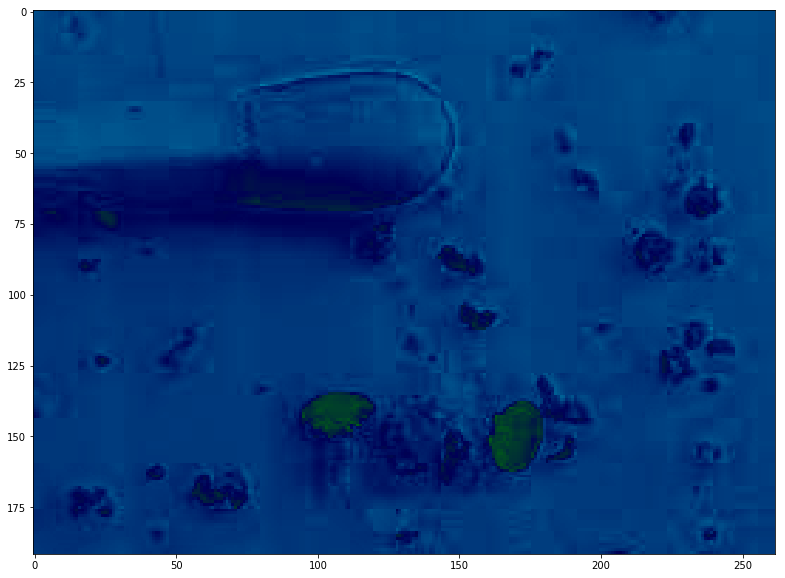

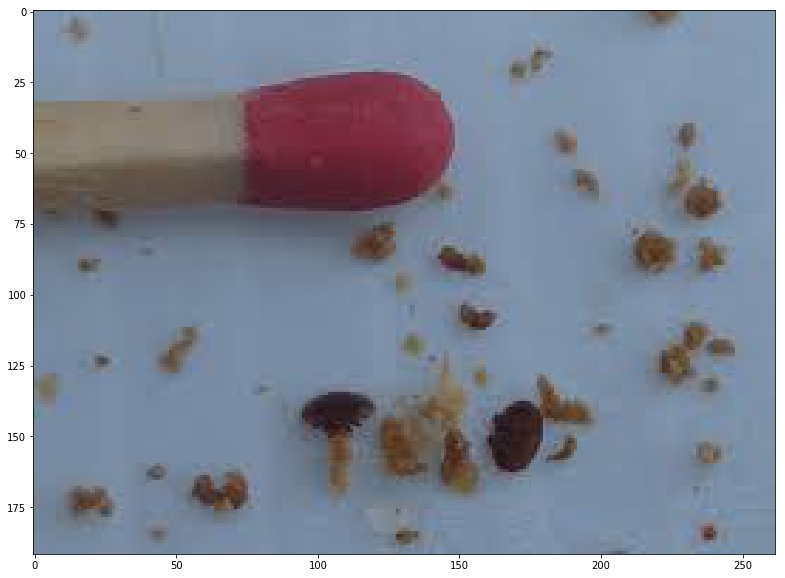

In [129]:
# Load the varroa plaque
#im = imageio.imread('Desktop/Varroa/plaque.jpg')
im=im1[:,:,0]
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the Ocean scale image 
plt.figure(figsize=(20, 10))
plt.imshow(im, vmin=-2, vmax=255,cmap='ocean')
#plt.imshow(im, vmin=0, vmax=255,cmap='gray')
#plt.colorbar()
#format_and_render_plot()
plt.figure(figsize=(20, 10))
plt.imshow(im1, cmap=None)
plt.show()

Histograms
Histograms display the distribution of values in your image by binning each element by its intensity then measuring the size of each bin.
The area under a histogram is called the cumulative distribution function. It measures the frequency with which a given range of pixel intensities occurs.
For this exercise, describe the intensity distribution in im by calculating the histogram and cumulative distribution function and displaying them together.
* Import scipy.ndimage as ndi.
* Generate a 256-bin histogram of im which covers the full range of np.uint8values.
* Calculate the cumulative distribution function for im. First, find the cumulative sum of hist, then divide by the total number of pixels in hist.
* Plot hist and cdf on separate subplots. This has been done for you.


In [130]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi


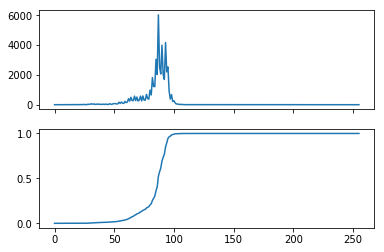

In [131]:
# Create a histogram, binned at each possible value
hist = ndi.histogram(im,min=0, max=355,bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
#format_and_render_plot()
plt.show()

Create a mask

Masks are the primary method for removing or selecting specific parts of an image. They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.
For this exercise, try to use a simple intensity threshold to differentiate between skin and bone in the hand radiograph. (im has been equalized to utilize the whole intensity range.)
Below is the histogram of im colored by the segments we will plot.

* Create a bone mask by selecting pixels with intensities greater than or equal to 145.
* Create a skin mask by selecting pixels with intensities greater than or equal to 45 and less than 145.
* Plot the skin and bone masks in grayscale.



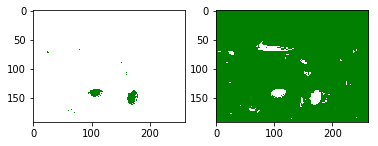

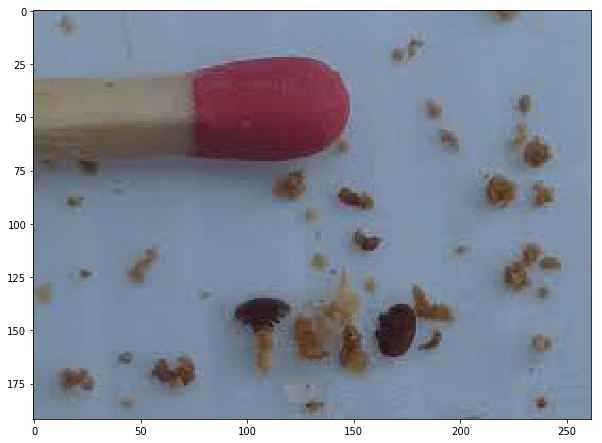

In [132]:
# Create varroa and plaque masks
mask_varroa = (im >=60)
mask_plaque = (2<=im)&(im<80)

# Plot the plaque (0) and varroa (1) masks
fig, axes = plt.subplots(1,2, sharex=True)
axes[0].imshow(mask_varroa, cmap='ocean', label = 'Varroa')
axes[1].imshow(mask_plaque, cmap='ocean', label='Lange')
#format_and_render_plot()
plt.figure(figsize=(10, 10))
plt.imshow(im1, cmap=None)

plt.show()

Segment the image
In this chapter, we'll work with magnetic resonance (MR) imaging data from the Sunnybrook Cardiac Dataset. The full image is a 3D time series spanning a single heartbeat. These data are used by radiologists to measure the ejection fraction: the proportion of blood ejected from the left ventricle during each stroke.

To begin, segment the left ventricle from a single slice of the volume (im). First, you'll filter and mask the image; then you'll label each object with ndi.label().

This chapter's exercises have the following imports:

import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
Instructions 1/2
50 XP
Apply a median filter to im. Set the size to 3.
Create a mask of values greater than 60, then use ndi.binary_closing() to fill small holes in it.
Extract a labeled array and the number of labels using ndi.label().

b/ Apply a mask
Although masks are binary, they can be applied to images to filter out pixels where the mask is False.

NumPy's where() function is a flexible way of applying masks. It takes three arguments:

np.where(condition, x, y)
condition, x and y can be either arrays or single values. This allows you to pass through original image values while setting masked values to 0.

Let's practice applying masks by selecting the bone-like pixels from the hand x-ray (im).

Instructions
100 XP
Create a Boolean bone mask by selecting pixels greater than or equal to 145.
Apply the mask to your image using np.where(). Values not in the mask should be set to 0.
Create a histogram of the masked image. Use the following arguments to select only non-zero pixels: min=1, max=255, bins=255.
Plot the masked image and the histogram. This has been done for you.


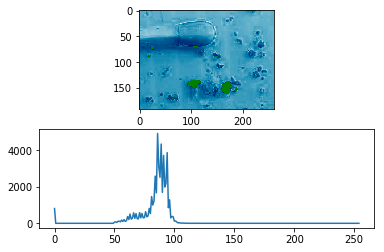

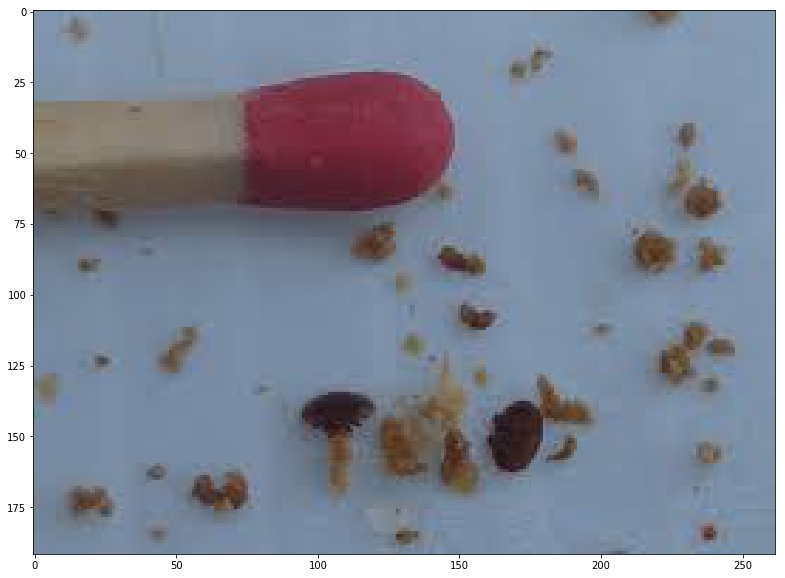

In [133]:


# Screen out non-bone pixels from "im"
mask_varroa = im>=70
im_varroa = np.where(mask_varroa, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_varroa, min=0, max=355, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_varroa, cmap='ocean')
axes[1].plot(hist)
#format_and_render_plot()
plt.figure(figsize=(20, 10))
plt.imshow(im1, cmap=None)
plt.show()

c/ Tune a mask
Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

binary_dilation: Add pixels along edges
binary_erosion: Remove pixels along edges
binary_opening: Erode then dilate, "opening" areas near edges
binary_closing: Dilate then erode, "filling in" holes
For this exercise, create a bone mask then tune it to include additional pixels.

For the remaining exercises, we have run the following import for you:

import scipy.ndimage as ndi
Instructions
100 XP
Create a bone by selecting pixels from im that are greater than or equal to 145.
Use ndi.binary_dilation() to increase the size of mask_bone. Set the number of iterations to 5 to perform the dilation multiple times.
Use ndi.binary_closing() to fill in holes in mask_bone. Set the number of iterations to 5 to holes up to 10 pixels wide.
Plot the original and tuned masks.

Instructions
100 XP
Create a bone by selecting pixels from im that are greater than or equal to 145.
Use ndi.binary_dilation() to increase the size of mask_bone. Set the number of iterations to 5 to perform the dilation multiple times.
Use ndi.binary_closing() to fill in holes in mask_bone. Set the number of iterations to 5 to holes up to 10 pixels wide.
Plot the original and tuned masks.

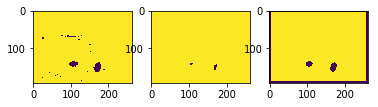

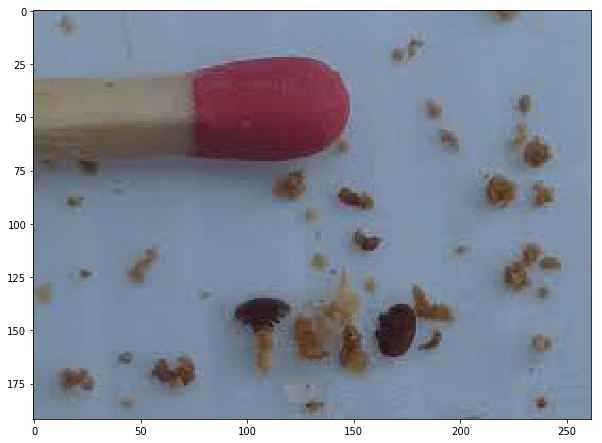

In [134]:
# Create and tune bone mask
mask_varroa = im>=70
mask_dilate = ndi.binary_dilation(mask_varroa, iterations=5 )
mask_closed = ndi.binary_closing(mask_varroa, iterations=5 )

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_varroa)
axes[1].imshow(mask_dilate)
axes[2].imshow(mask_closed)
#format_and_render_plot()
plt.figure(figsize=(10, 10))
plt.imshow(im1, cmap=None)
plt.show()

Smoothing

Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity. The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.



The width of the distribution is controlled by the sigma argument, with higher values leading to larger smoothing effects.

For this exercise, test the effects of applying Gaussian filters to the foot x-ray before creating a bone mask.

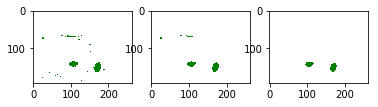

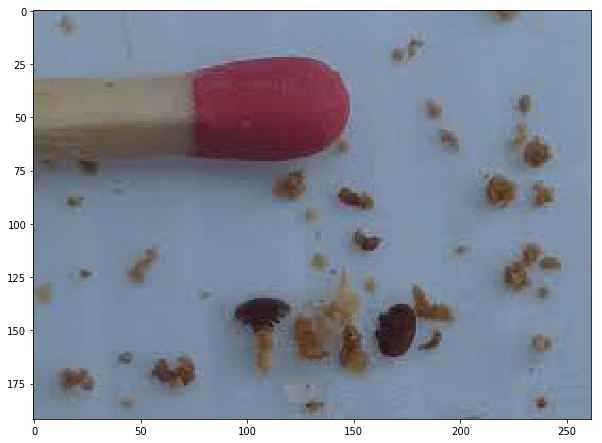

In [135]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=2)

# Draw bone masks of each image

fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 70, cmap="ocean")
axes[1].imshow(im_s1>=70, cmap="ocean")
axes[2].imshow(im_s3>=70, cmap="ocean")
#format_and_render_plot()
plt.figure(figsize=(10, 10))
plt.imshow(im1, cmap=None)

plt.show()

In [136]:
#save smooth images
#imageio.save("Desktop/Varroa/im_s1.gif",im_s1)

B/ Feature detection


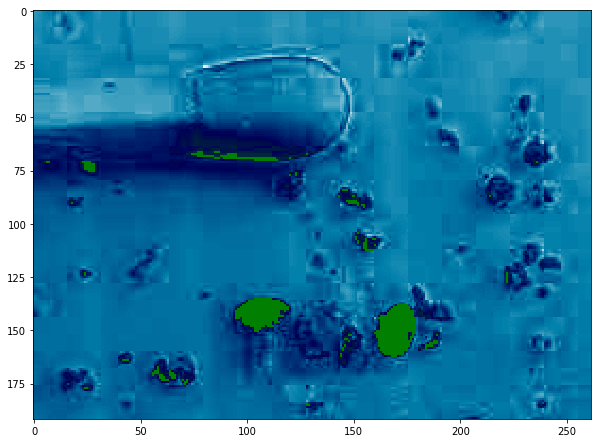

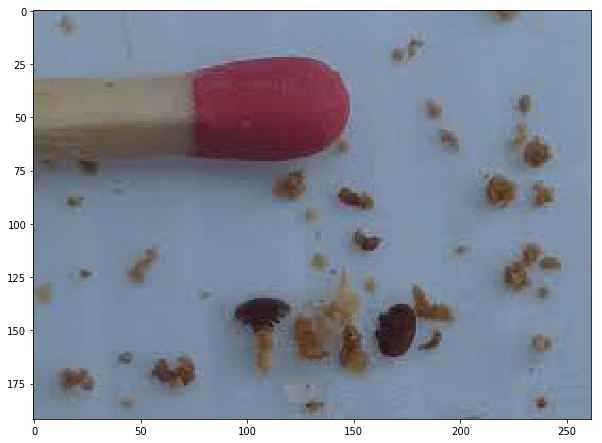

In [137]:
#image 
plt.figure(figsize=(10, 10))
plt.imshow(im_varroa,cmap='ocean', vmin=40, vmax=170)
plt.figure(figsize=(10, 10))
plt.imshow(im1, cmap=None)
plt.show()

Detect edges (1)
Filters can also be used as "detectors." If a part of the image fits the weighting pattern, the returned value will be very high (or very low).

In the case of edge detection, that pattern is a change in intensity along a plane. A filter detecting horizontal edges might look like this:

weights = [[+1, +1, +1],
           [ 0,  0,  0],
           [-1, -1, -1]]
For this exercise, create a vertical edge detector and see how well it performs on the hand x-ray (im).

Instructions
100 XP
Create a 3x3 array of filter weights that detects when intensity changes from the left to right. Use only the values 1, 0 and -1.
Convolve im with the edge detector.
Plot the horizontal edges with the seismic colormap. Use vmin=-150 and vmax=150 to control adjust your colormap scale.
Add a colorbar and render the results.

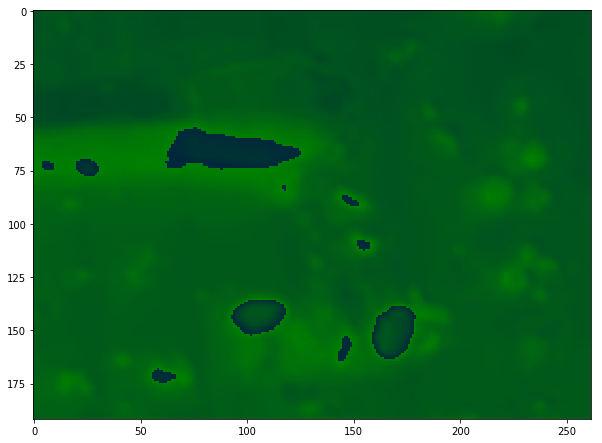

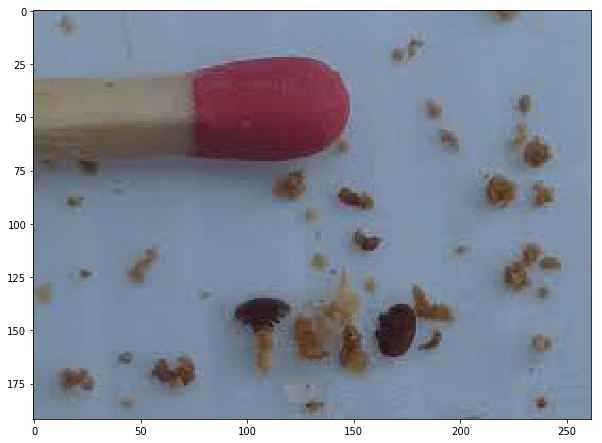

In [138]:
# Set weights to detect vertical edges
weights = [[1,-1,0], [1,0,0], [1,1,0]]

# Convolve "im" with filter weights
edges = ndi.convolve(im_s3,weights, mode='reflect')

# Draw the image in color
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='ocean', vmin=-2, vmax=1100) #vmin=-2, vmax=1100
#plt.colorbar()
#format_and_render_plot()
plt.figure(figsize=(10, 10))
plt.imshow(im1, cmap=None)
plt.show()



Detect edges (2)
Edge detection can be performed along multiple axes, then combined into a single edge value. For 2D images, the horizontal and vertical "edge maps" can be combined using the Pythagorean theorem:

z=x2+y2‾‾‾‾‾‾‾√
One popular edge detector is the Sobel filter. The Sobel filter provides extra weight to the center pixels of the detector:

weights = [[ 1,  2,  1], 
           [ 0,  0,  0],
           [-1, -2, -1]]
For this exercise, improve upon your previous detection effort by merging the results of two Sobel-filtered images into a composite edge map.

Instructions

Apply ndi.sobel() to im along the first and second axes.
Calculate the overall edge magnitude using the Pythagorean theorem. Use np.sqrt() and np.square().
Display the magnitude image. Use a grayscale colormap and set vmax to 75.

[[  0   0   0 ...   0   0   0]
 [255 254 255 ...   0   0   0]
 [252 252 252 ...   0   0   0]
 ...
 [  4   4   4 ...   0   0   0]
 [  4   3   2 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


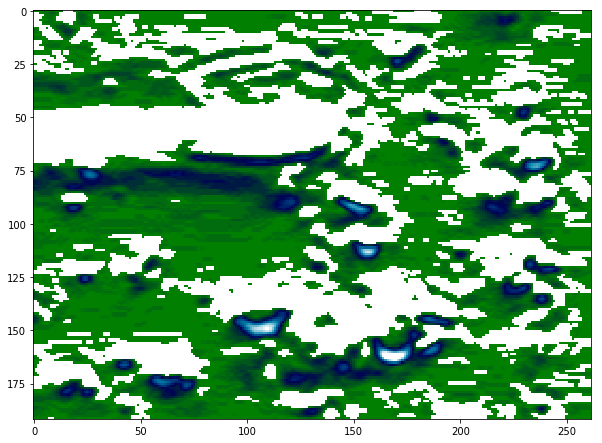

[[0.    4.    8.    ... 0.    0.    0.   ]
 [1.414 4.473 7.07  ... 0.    0.    0.   ]
 [4.473 5.656 7.21  ... 0.    0.    0.   ]
 ...
 [4.    4.473 5.656 ... 0.    0.    0.   ]
 [4.    4.242 4.473 ... 0.    0.    0.   ]
 [0.    4.    4.    ... 0.    0.    0.   ]]


ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

In [139]:
# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(im_s3,axis=0)
sobel_ax1 = ndi.sobel(im_s3, axis=1)
print(sobel_ax0)
plt.figure(figsize=(10, 10))
plt.imshow(sobel_ax0, cmap='ocean', vmax=75) #cmap='ocean', vmax=75
#format_and_render_plot()
plt.show()
# Calculate edge magnitude 
edges = np.sqrt(np.square(sobel_ax0)+np.square(sobel_ax1))
print(edges)
#Plot edge magnitude
plt.imshow(edges) #cmap='ocean', vmax=75
#format_and_render_plot()
plt.show()

Filter convolutions
Filters are an essential tool in image processing. They allow you to transform images based on intensity values surrounding a pixel, rather than globally.

2D array convolution. By Michael Plotke [CC BY-SA 3.0  (https://creativecommons.org/licenses/by-sa/3.0)], from Wikimedia Commons

For this exercise, smooth the foot radiograph. First, specify the weights to be used. (These are called "footprints" and "kernels" as well.) Then, convolve the filter with im and plot the result.



Smoothing
Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity. The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.



The width of the distribution is controlled by the sigma argument, with higher values leading to larger smoothing effects.

For this exercise, test the effects of applying Gaussian filters to the foot x-ray before creating a bone mask.

In [140]:
im = np.array([[93, 36,  87], 
               [18, 49,  51],
               [45, 32,  63]])

im_filt=ndi.median_filter(im,size=3)
assert im_filt[1,1] == 49
im_filt

array([[49, 51, 51],
       [45, 49, 51],
       [45, 45, 51]])


Segment the heart
In this chapter, we'll work with magnetic resonance (MR) imaging data from the Sunnybrook Cardiac Dataset. The full image is a 3D time series spanning a single heartbeat. These data are used by radiologists to measure the ejection fraction: the proportion of blood ejected from the left ventricle during each stroke.

To begin, segment the left ventricle from a single slice of the volume (im). First, you'll filter and mask the image; then you'll label each object with ndi.label().

This chapter's exercises have the following imports:

Num. Labels: 1


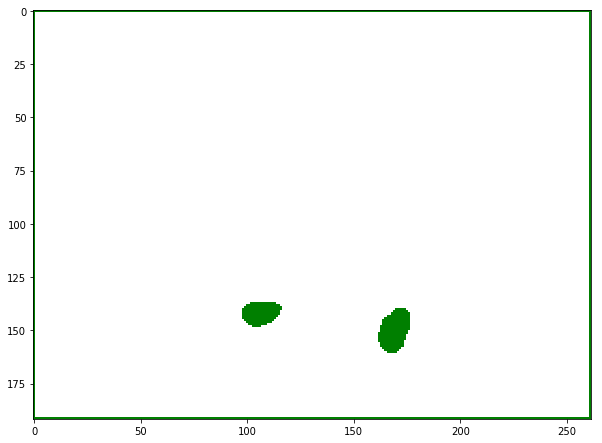

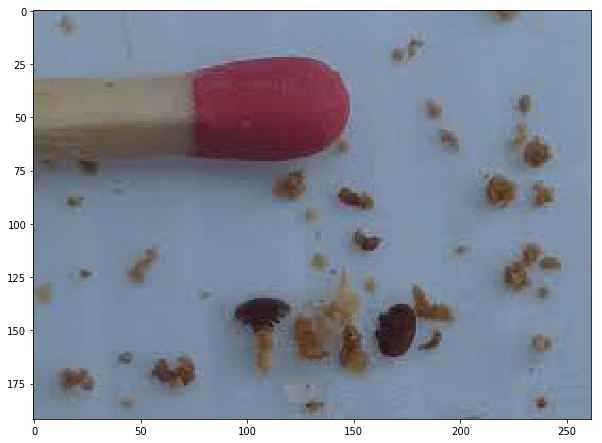

In [141]:
# Smooth intensity values
im_filt = ndi.median_filter(im_s3, size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt>60, 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='ocean')
plt.figure(figsize=(10, 10))
plt.imshow(im1, cmap=None)
plt.show()

In [142]:
#bounding box
labels, nlabels = ndi.label(mask)
boxes = ndi.find_objects(labels)
boxes[0]


(slice(1, 191, None), slice(1, 261, None))

Select objects
Labels are like object "handles" - they give you a way to pick up whole sets of pixels at a time. To select a particular object:

Find the label value associated with the object.
Create a mask of matching pixels.
For this exercise, create a labeled array from the provided mask. Then, find the label value for the centrally-located left ventricle, and create a mask for it.

Use ndi.label() to assign labels to each separate object in mask.
Find the index value for the left ventricle label by checking the center pixel (128, 128).
Create a mask of pixels matching the left ventricle label. Using np.where, set pixels labeled as lv_val to 1 and other values to np.nan.
Use plt.imshow() to overlay the selected label on the current plot.

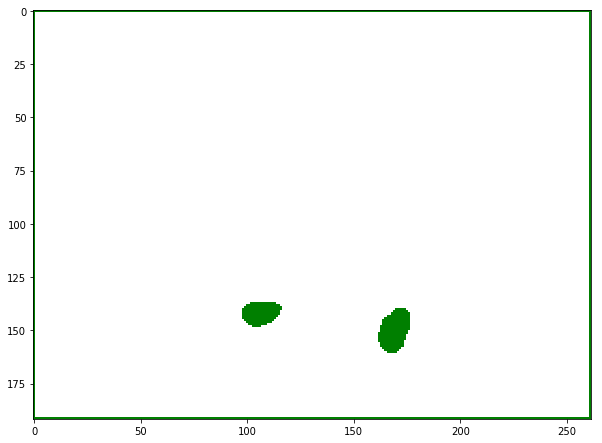

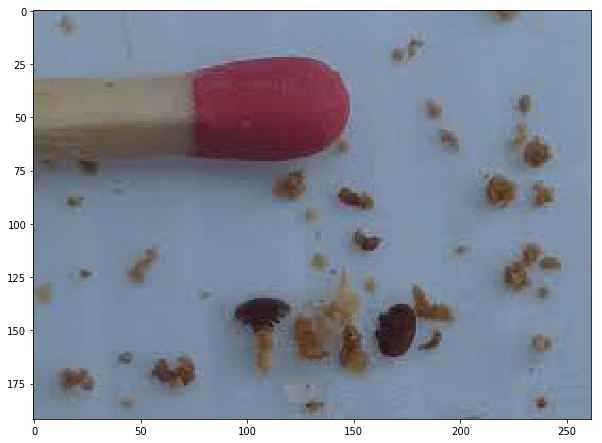

In [143]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select varroas pixels
lv_val = labels[150, 90]
lv_mask = np.where(labels==lv_val,1,0) #np.nan

# Overlay selected label
plt.figure(figsize=(10, 10))
plt.imshow(lv_mask, cmap='ocean')
plt.figure(figsize=(10, 10))
plt.imshow(im1, cmap=None)
plt.show()

A) Plot image colormap in plasma type
Matplotlib's color pattern https://matplotlib.org/examples/color/colormaps_reference.html



# Draw the image in OCEANSCALE
im2_cmapgrey=plt.imshow(im1[:,:,0], cmap='ocean') # im[:,:,0] transform the image from 3D to 2D 
#see https://stackoverflow.com/questions/46739739/why-does-plt-imshowim-cmap-gray-not-show-a-grayscale-image
#Saving file as ‘logo.png’
#imageio.imwrite('Desktop/Varroa/im2_cmapOcean.jpg', im2_cmapOcean[:,:,0])
# Render the image
plt.colorbar()
plt.show()


In [144]:
fig, ax = plt.subplots(1, 1)
ax.hist(im_s3.ravel(), bins=32, range=[-300, 300])
ax.set_xlim()

(-330.0, 330.0)

In [145]:
# Print image attributes
print('Image type:', type(im_s3))
print('Shape of image array:', im_s3.shape)

Image type: <class 'numpy.ndarray'>
Shape of image array: (192, 262)


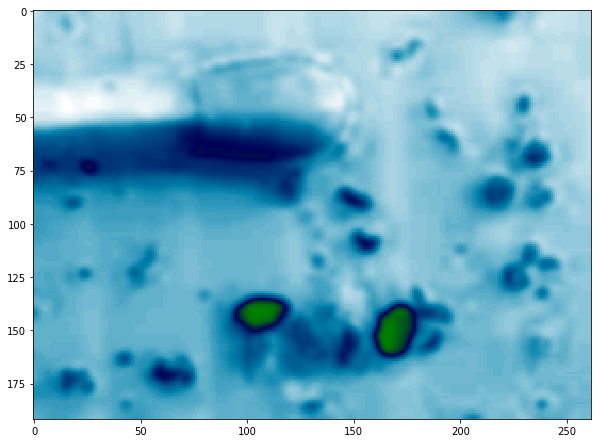

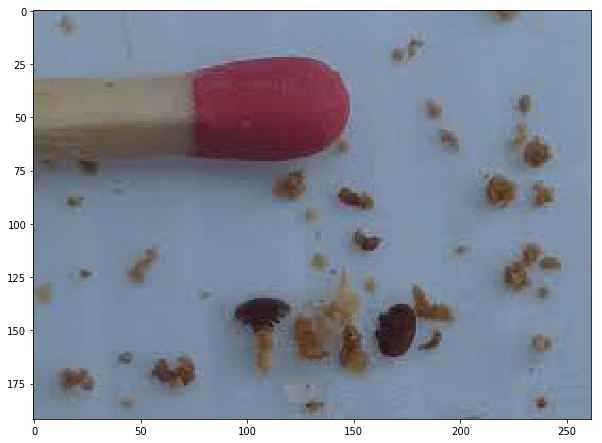

In [154]:
# Draw the image in ocean
plt.figure(figsize=(10, 10))
plt.imshow(im_s3, cmap='ocean') # im[:,:,0] transform the image from 3D to 2D 
#see https://stackoverflow.com/questions/46739739/why-does-plt-imshowim-cmap-gray-not-show-a-grayscale-image
#Saving file as ‘logo.png’
#imageio.imwrite('Desktop/Varroa/im2_cmapOcean.jpg', im2_cmapOcean[:,:,0])
# Render the image
plt.figure(figsize=(10, 10))
plt.imshow(im1)
plt.show()


# créer un masque et label

In [147]:
#import SKSimage

import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

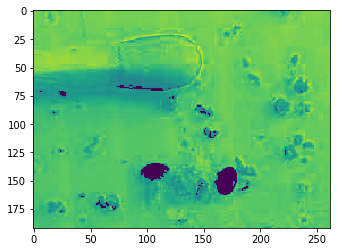

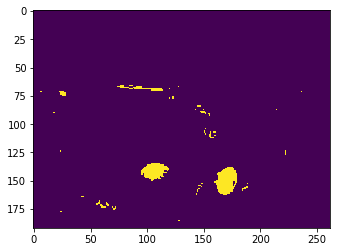

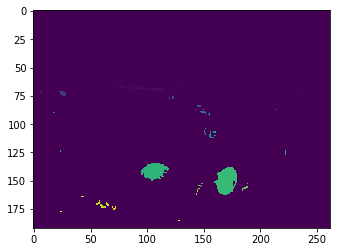

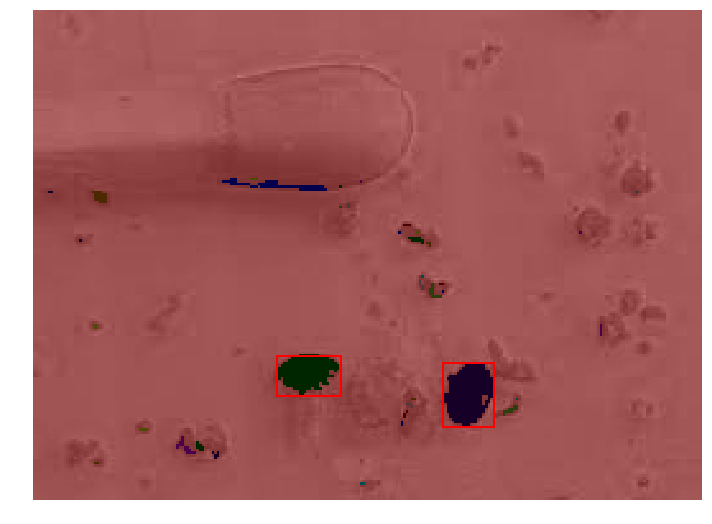

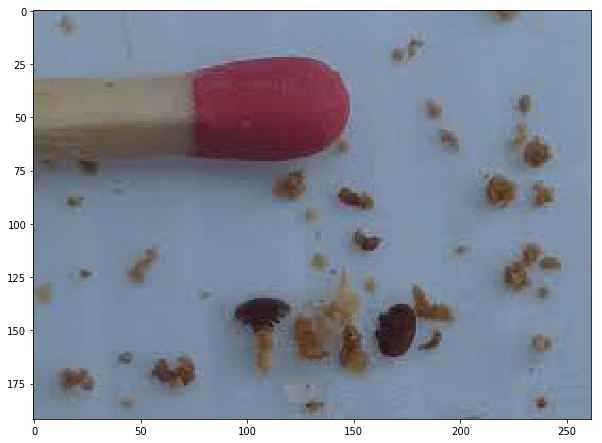

In [163]:
#image = data.coins()[50:-50, 50:-50]
image=im_varroa
plt.imshow(image)
plt.show()
# apply threshold
thresh = threshold_otsu(image)
bw = closing(image <= thresh, square(1))


# remove artifacts connected to image border
cleared = clear_border(bw)
plt.tight_layout()
plt.imshow(cleared)
plt.show()
# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)
plt.tight_layout()
plt.imshow(label_image)
plt.show()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_label_overlay)
plt.tight_layout()

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 200:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(im1)
plt.show()

OTHER TYPES OF VARROAS IMAGES

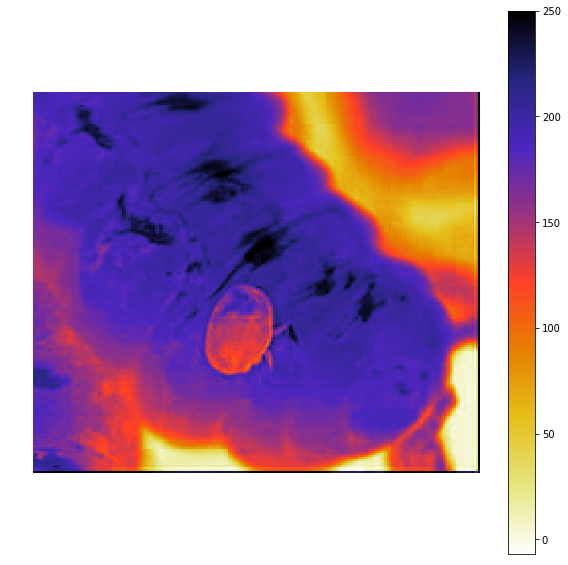

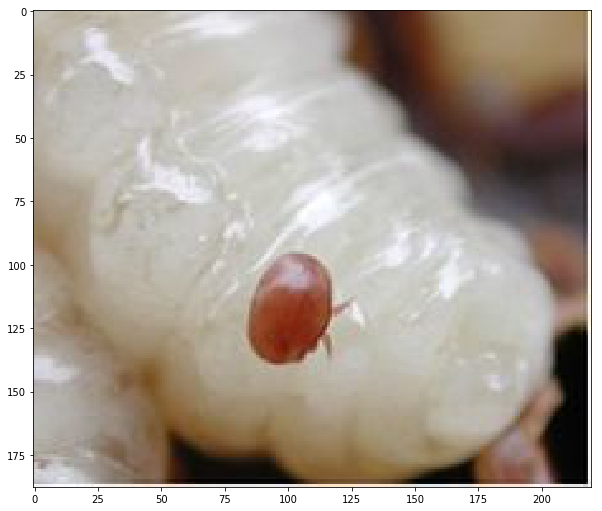

In [149]:
# Remove axis ticks and labels Larve
plt.figure(figsize=(10, 10))
plt.axis('off')
im2_cmapOceanOpt=plt.imshow(imlarve2[:,:,0],vmin=-7, vmax=250, cmap='CMRmap_r')
# Render the image
plt.colorbar()
plt.figure(figsize=(10, 10))
plt.imshow(imlarve2, cmap=None)
plt.show()

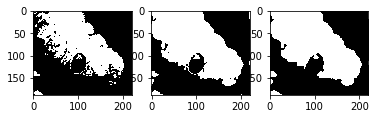

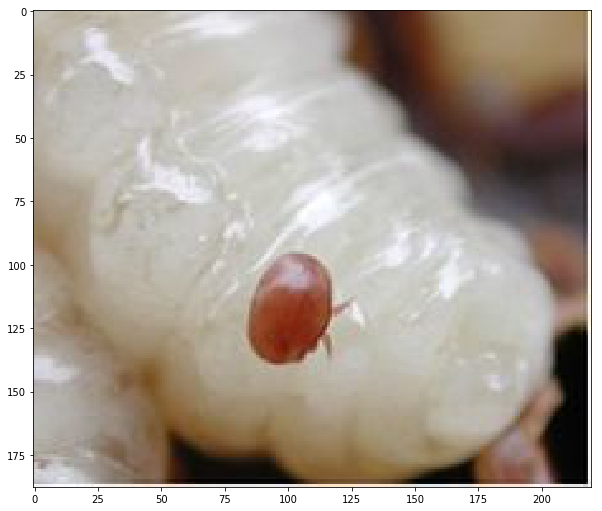

In [150]:
# Smooth "im" with Gaussian filters
im_s11 = ndi.gaussian_filter(imlarve2[:,:,0], sigma=1)
im_s31 = ndi.gaussian_filter(imlarve2[:,:,0], sigma=2)

# Draw masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(imlarve2[:,:,0] <=190, cmap='CMRmap_r')
axes[1].imshow(im_s11<=180,cmap='CMRmap_r')
axes[2].imshow(im_s31<=180, cmap='CMRmap_r')
#format_and_render_plot()
plt.figure(figsize=(10, 10))
plt.imshow(imlarve2, cmap=None)
plt.show()

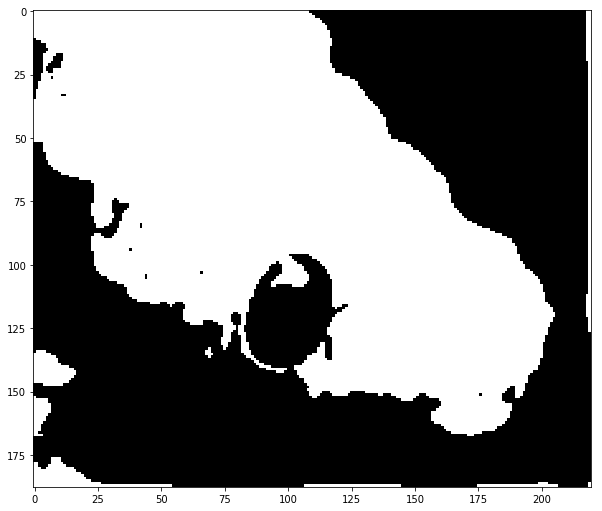

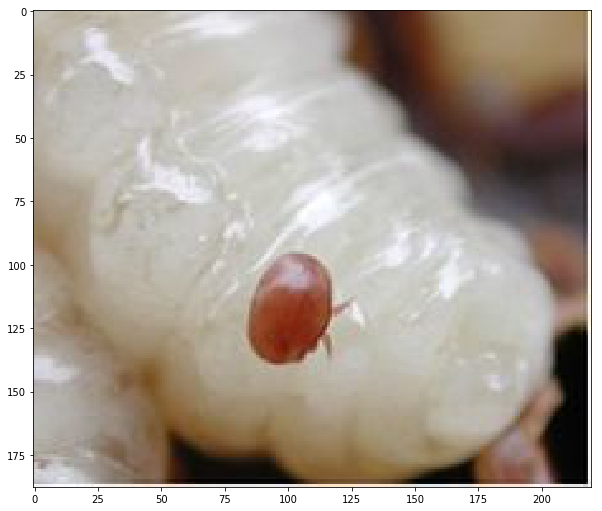

In [151]:
# Draw the image in 
plt.figure(figsize=(10, 10))
plt.imshow(im_s11<=180, cmap='CMRmap_r') # im[:,:,0] transform the image from 3D to 2D 
#see https://stackoverflow.com/questions/46739739/why-does-plt-imshowim-cmap-gray-not-show-a-grayscale-image
#Saving file as ‘logo.png’
#imageio.imwrite('Desktop/Varroa/im2_cmapOcean.jpg', im2_cmapOcean[:,:,0])
# Render the image
plt.figure(figsize=(10, 10))
plt.imshow(imlarve2, cmap=None)
plt.show()



Num. Labels: 1
(192, 262)


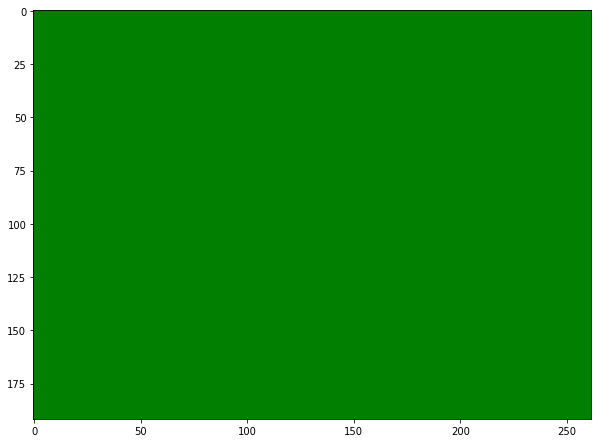

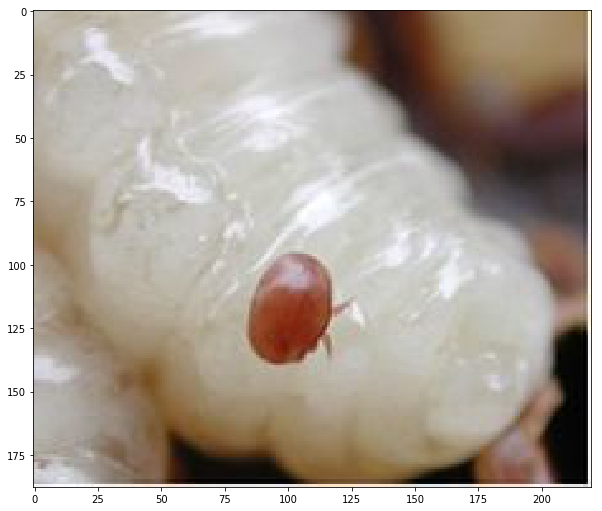

In [152]:
# Smooth intensity values
im_filt1 = ndi.median_filter(im_s11, size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt>=180, 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
#labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)
print(mask.shape)
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='ocean')
plt.figure(figsize=(10, 10))
plt.imshow(imlarve2, cmap=None)
plt.show()

In [153]:
#bounding box
labels, nlabels = ndi.label(mask)
boxes = ndi.find_objects(labels)
boxes[0]



IndexError: list index out of range

In [ ]:

# Create mask
labels, nlabels = ndi.label(mask)
lv_val = labels[20, 50]
lv_mask = np.where(labels == lv_val, 1, 0)
plt.figure(figsize=(10, 10))
plt.imshow(lv_mask, cmap='CMRmap_r')
plt.show()
# Find bounding box 
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes[0]))
print('Indices for first box:', bboxes[0])

# Crop to the varroas (index 0)
im_lv = im1[bboxes[0]]


# Plot the cropped image
plt.figure(figsize=(10, 10))
plt.imshow(imlarve2, cmap=None)
#format_and_render_plot()
plt.show()

B) Plot varroa on bees image  colormap in 'ocean' type

In [ ]:
# Draw the image in grayscale 
plt.figure(figsize=(10, 10))
plt.imshow(imBee2[:,:,0], vmin=-7, vmax=250, cmap='CMRmap_r') # im[:,:,0] transform the image from 3D to 2D 

#see https://stackoverflow.com/questions/46739739/why-does-plt-imshowim-cmap-gray-not-show-a-grayscale-image

# Render the image
plt.colorbar()
plt.show()



In [ ]:
# Draw the image with greater contrast
plt.figure(figsize=(10, 10))
plt.imshow(imBee2[:,:,0],vmin=-10, vmax=250, cmap= 'CMRmap_r')

# Render the image
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(10, 10)) 
imBee2[1, 0, 1] = 0
imBee2[1, 0, 2] = 0
plt.imshow(imBee2[:,:, 0], cmap='Greys') 
plt.show()